* **Authorship identification is the task of identifying the author of a given text from a set of suspects. The main concern of this task is to define an appropriate characterization of texts that captures the writing style of authors.**

* An approach, a set of documents written by a set of authors, create a system which, given a new unseen document, is able to tell the original author (from the available set of authors) of that document.

* At present, there are a lot of Authorship Attribution Systems available online. But on a very high level, we can divide these systems into two categories.
    1. Machine Learning Based
    2. Deep Learning Based
    
* Machine learning based authorship attribution systems extract features like average length of words, the frequency of digits used, the frequency of letters used e.t.c. and use them to classify documents. On the other hand, deep learning based methods extract features on there own to classify documents.

# Mainly two approaches are there in authorship attribution or authorship identification
# 1. Profile-based Authorship Identification
    All available text samples by one candidate author are treated cumulatively, that is they are concatenated in one big document and then a single representation is extracted to become the profile of the author. concatinating all documents of a author and treating as single document

# 2. Instance-based Authorship Identifcation
    All available samples by one author are treated separately. Each text sample has its own representation. Since these approaches are usually combined with discriminative machine learning algorithms, like support vector machines, they require multiple instances per class. Hence, when only one docu-ment is available for a candidate author, this document has to be split into multiple samples.

* Here we are dealing with Instance based authorsh

# Instance-Based Authorship Attribution

##  <div style="text-align: center; color:blue"> importing necessary libraries</div>

* pandas, numpy, nltk, os,glob, sklearn etc.. these are the main important libraries to perform the operations

In [1]:
import io, os, sys, types
import IPython
%run stylometric_Features.ipynb import FeatureExtration
%run N_gram_Final.ipynb import ngramFeatureExtraction
import pandas as pd
import seaborn as sns
import nltk
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from scipy import sparse
import math
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import operator
import itertools
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Using matplotlib backend: Qt5Agg


In [2]:
#from stylometric_Features import LexicalFeatures,SyntacticFeatures
#from stylometric_Features import FeatureExtration
#from ngrams_Features import train_model

#data reading mutilple files
#hrudayashiva-instance-->01-12
#ravi beligeri-isntance-->13-25
#somashaker-isntance-->26-36

## <div style="text-align: center"> reading file and extracting Lexical Features</div>

Instance-based authorship attribution focuses on the individual documents in feature extracting! so here we have totlal 36 files with unique file names!
these files are written  by Hrudayashiva, Ravibeligere and somashanakar; to distinguish each file, we have created a dictionary in python which can have seperate itarative itmes for each authors;
suppose hrudayashiva we have 12 files, and numbered from 01 to 12
* In Python, the glob module is used to retrieve files/pathnames matching a specified pattern.
* The pattern rules of glob follow standard Unix path expansion rules.<br>
* this is built in module in python no exeternal library required for this



In [3]:
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
all_instances={
'hrudayashiva':["01","02","03","04","05","06","07","08","09",10,11,12],
    'ravibeliger':[13,14,15,16,17,18,19,20,21,22,23,24,25],
    'somashaker':[26,27,28,29,30,31,32,33,34,35,36]
}

stop_words_list = "C://Users/RAVIKUMAR/PycharmProjects/Authorship_Attribution_Instance/Data_2/new_stop_words.txt"

data_folder = "C://Users/RAVIKUMAR/PycharmProjects/Authorship_Attribution_Instance/Data_2/train"
instance_by_author={}
for author,AllFiles_Per_author in all_instances.items():
    for i in AllFiles_Per_author:
        for name in glob.glob(f"C://Users/RAVIKUMAR/PycharmProjects/Authorship_Attribution_Instance/Data_2/train/instance{i}.txt"):
            with open(name, encoding='utf-8') as file:
                instance_by_author[author+str(i)]=file.read()
all_authors=[]
text=[]
original = pd.DataFrame()
for author, file in instance_by_author.items():
    all_authors.append(author)
    text.append(file)
    
original["Authors with id"] = all_authors
original["text files"]=text
df=pd.DataFrame()  

## created data frame  Authors with id	 and text files

In [4]:
#original

## split the data into training and testing <br>


In [5]:
# labelencoder = LabelEncoder()
# y = labelencoder.fit_transform(y)
X=original["text files"]
y=all_authors
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

* from sklearn.model_selection import **train_test_split** <br>**train_test_split()** is built in method in sklearn, which will split the given data into training and testing with custom size;

In [6]:
print("------------------LEXICAL FEATURES EXTRACTING----------")
print()
author_fvs={}
feature_vectors=[]
for (text,author) in zip(X_train, y_train):
    author_fvs[author]=FeatureExtration(text)
    #feature_vectors.append(FeatureExtration(text))
print("successfully extracted all the features\n \n ")

------------------LEXICAL FEATURES EXTRACTING----------

successfully extracted all the features
 
 


## Feature Extracting <br>this is Major step in authorship attribution ----Feature Extraction
text Data converting into Numerical Data<br>
In this authorship approach we have extracted **Lexical features** and **n-gram features**
* **FeatureExtration()** is method created in another jupyter notebook file
which will take a input text file and process it, and then extract the feautures and stored in a vector
This process involves iterating all the training files to extract the lexical features and stored in a vector<br>
this vector is mapped to unique author id<br>
* Ex: hrudayashiva03: [list of all features of this particular file],  like that all the training files processed and all features extracted

In [7]:
train_data = pd.DataFrame()
train_data["X_train"] =X_train
train_data["y_train"] = y_train
train_data["features"] =author_fvs.values()

In [8]:
#train_data.head(5)

In [9]:
Y = pd.Series(train_data["y_train"])
Y.replace(r'(^ra.*)','ravibeligeri',regex=True, inplace = True)
Y.replace(r'(^hr.*)','hrudayashiva',regex=True, inplace = True)
Y.replace(r'(^som.*)','somashaker',regex=True, inplace = True)
train_data["y_train"] = Y

y_train = train_data["y_train"]
vectors = train_data["features"]
# labelencoder = LabelEncoder()
# y = labelencoder.fit_transform(y)
arr = [0,0,0,0,0,0]
for i in vectors:
    for k in range(500-len(i)):
        i.append(arr)
arr = (np.array(vectors))

After extracting lexical features, we will be removeving the **authors id** to **Actual Author Name** for classification ease; <br>
Ex: **hrudayashiva01--12=Hrudayashiva** <br>
* all the extracted features are not in same size, for processing and shaping conviniet we have added additional zeros to make all the vectors are in same size;

In [10]:
# mean normalization of the data . converting into normal distribution having mean=0 , -0.1<x<0.1
#sc = StandardScaler().fit(arr)
#train_data.head()

In [11]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list
flatten_final=[]
for i in range(len(vectors)):
    flatten_final.append(flatten_list(arr[i]))

# nested_list = vectors[0]
# print('Original List', len(nested_list)
print('Transformed Flat List', len(flatten_final))

Transformed Flat List 28


Flattening a list of lists entails converting a 2D list into a 1D list by un-nesting each list item stored in the list of lists
this ensures the concatinating all the features of same file; prior we have extracted features and each feature is in it's own list, it creates nested list;<br> now we will be converting 2D to 1D, i.e Gathering all the features belong to same file into a single vector for better convininent

In [12]:
flatten_final = np.asarray(flatten_final)
a = flatten_final
col_mean = np.nanmean(a, axis=0)
#Find indices that you need to replace
inds = np.where(np.isnan(a))
#Place column means in the indices. Align the arrays using take
a[inds] = np.take(col_mean, inds[1])
flatten_final = a
flatten_final=sparse.csr_matrix(flatten_final)

* removing NaN values from the flatten array with mean of columns <br>
after removing all the NaN values , created sparse matrix for the non zero values

In [13]:
X_test_t=[]
for i in X_test:
    X_test_t.append(FeatureExtration(i))

In [14]:
arr1 = [0,0,0,0,0,0]
for i in X_test_t:
    for k in range(500-len(i)):
        i.append(pd.Series(arr1))
arr2 = (np.array(X_test_t))
test_flaten=[]
for i in range(len(arr2)):
    test_flaten.append(flatten_list(arr2[i]))
    
test_flaten = np.asarray(test_flaten)
c = test_flaten
col_mean = np.nanmean(c, axis=0)
#Find indices that you need to replace
inds = np.where(np.isnan(c))
#Place column means in the indices. Align the arrays using take
c[inds] = np.take(col_mean, inds[1])
test_flaten = c
test_flaten = test_flaten.reshape(8, 3000)
test_flaten=sparse.csr_matrix(test_flaten)
z= pd.Series(y_test)
z.replace(r'(^ra.*)','ravibeligeri',regex=True, inplace = True)
z.replace(r'(^hr.*)','hrudayashiva',regex=True, inplace = True)
z.replace(r'(^som.*)','somashaker',regex=True, inplace = True)
y_test =z



# same procees applid to test data to convert numerical format 

# <div style="text-align:center">Model Budilding and Result:Lexical Feature Model</div>

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model =SVC(kernel='linear')
# model = model.fit(flatten_final.toarray(), y_train)

#model = GaussianNB()
#model= model.fit(flatten_final.toarray(), y_train)

# model = RandomForestClassifier(max_depth=2, random_state=0)
# model = model.fit(flatten_final.toarray(), y_train)

model = DecisionTreeClassifier(random_state=0)
model = model.fit(flatten_final.toarray(), y_train)
print("Taining Accuracy :",model.score(flatten_final.toarray(), y_train))
print("Testing Accuracy: ",model.score(test_flaten.toarray(), y_test))


Taining Accuracy : 1.0
Testing Accuracy:  0.5


In [16]:
flatten_final

<28x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 13045 stored elements in Compressed Sparse Row format>

In [17]:

from sklearn.metrics import classification_report

predictions = model.predict(test_flaten.toarray())
print(classification_report(y_test, predictions))

prd=pd.DataFrame()
prd['test text']=X_test
prd['author']=predictions

              precision    recall  f1-score   support

hrudayashiva       0.50      0.33      0.40         3
ravibeligeri       0.50      0.50      0.50         2
  somashaker       0.50      0.67      0.57         3

 avg / total       0.50      0.50      0.49         8



In [18]:
prd

,test text,author
8,\nಅದೊಂದು ಮಾಮೂಲಿ ದಿನ… ಆ ಸಂಜೆ ಒಂದು ಕಾರ್ಯಕ್ರಮಕ್ಕೆ...,hrudayashiva
35,"\n "" ಇರುವುದೆಲ್ಲವ ಬಿಟ್ಟು ಇರದುದರೆಡೆಗೆ ತುಡಿವುದೇ ಜ...",ravibeligeri
13,ಇತ್ತೀಚೆಗೊಂದು ಮಧ್ಯಾಹ್ನ ದಾವಣಗೆರೆಯಿಂದ ರವೀಂದ್ರನಾಥ್...,hrudayashiva
1,ಪ್ರಖ್ಯಾತ ಹಿಂದೂಸ್ತಾನಿ ಸಂಗೀತಗಾರ ಪಂಡಿತ್ ಪರಮೇಶ್ವರ ...,somashaker
4,\n'ಈ ಹಾಡನ್ನು ಬೇರೆ ಯಾರಿಂದಲಾದರೂ ಬರೆಸಿಬಿಡಿ ಪ್ಲೀಸ್...,somashaker
31,"\nಪ್ರಪಂಚ ರಹಸ್ಯಗಳ, ವಿಸ್ಮಯಗಳ ಆಗರ! ಎಲ್ಲಾ ಜೀವಿಗಳಂತ...",somashaker
14,"\n“ಅಬ್ಬ! ಎಂ.ಎ.? ಎಷ್ಟು ಕೊಡ್ತಾರಲೆ?"" ಕಣ್ಣರಳಿಸಿ ಕೇ...",ravibeligeri
27,\nಮಾಂಗಲ್ಯಂ ತಂತುನಾನೇನ ಮಮಜೀವನ ಹೇತುನಾ … ಎಂಬ ಮಂತ್ರ...,somashaker


In [19]:
#original

# <div style="text-align:center">n-gram Feature Extraction and model building</div>

In [20]:
#---------------------------------------------------------------------------------------------
print("N-grams features- extracting ")
ngramFeatureExtraction()
print("---------------n-grams features Extracted successfully-------------")
#------------------------------------------------------------------------------------------------------

N-grams features- extracting 
Training Accuracy : 1.0
Testing Acuuracy  :  0.875
              precision    recall  f1-score   support

hrudayashiva       1.00      0.67      0.80         3
ravibeligeri       0.67      1.00      0.80         2
  somashaker       1.00      1.00      1.00         3

 avg / total       0.92      0.88      0.88         8

---------------n-grams features Extracted successfully-------------


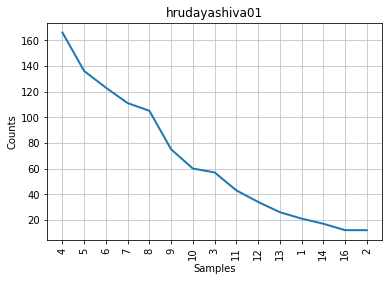

<FreqDist with 19 samples and 1012 outcomes>

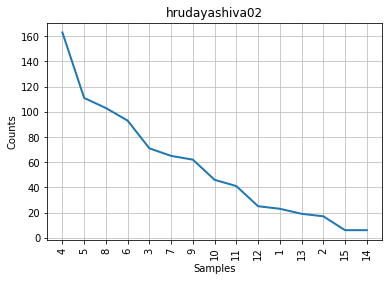

<FreqDist with 20 samples and 865 outcomes>

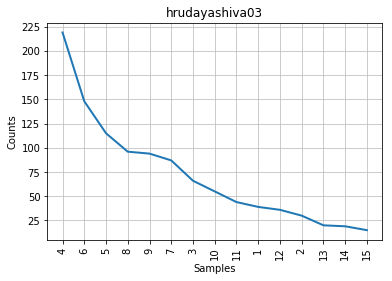

<FreqDist with 22 samples and 1101 outcomes>

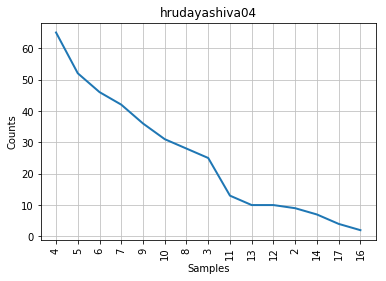

<FreqDist with 19 samples and 386 outcomes>

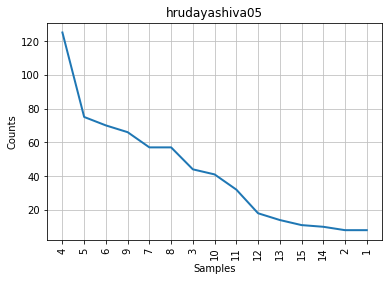

<FreqDist with 21 samples and 653 outcomes>

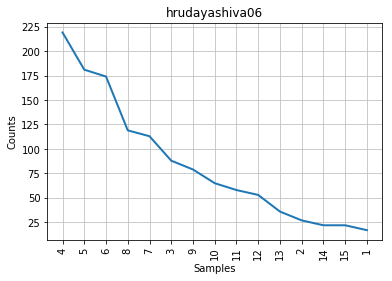

<FreqDist with 21 samples and 1309 outcomes>

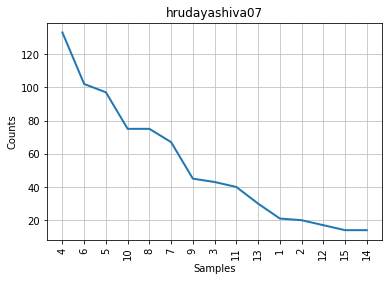

<FreqDist with 22 samples and 813 outcomes>

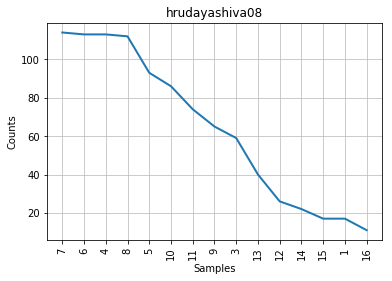

<FreqDist with 22 samples and 988 outcomes>

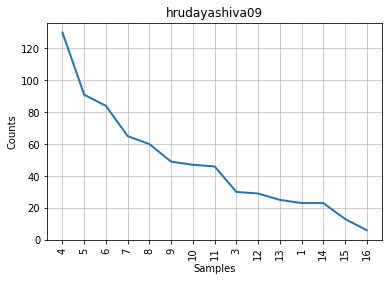

<FreqDist with 22 samples and 739 outcomes>

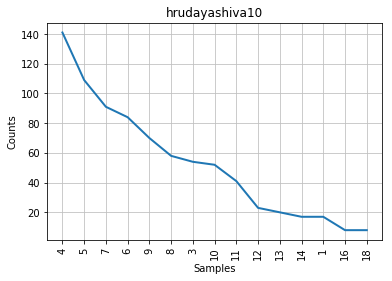

<FreqDist with 21 samples and 816 outcomes>

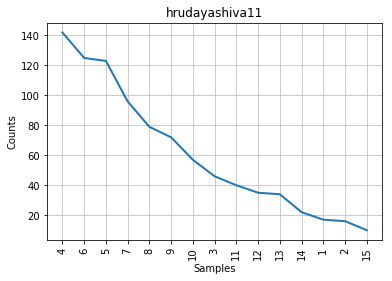

<FreqDist with 22 samples and 943 outcomes>

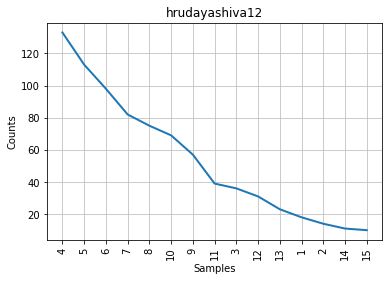

<FreqDist with 21 samples and 833 outcomes>

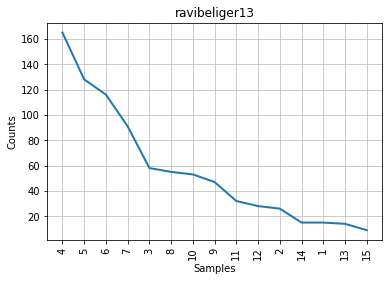

<FreqDist with 21 samples and 874 outcomes>

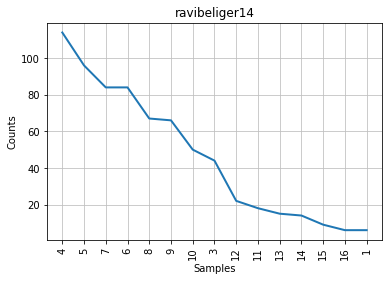

<FreqDist with 21 samples and 713 outcomes>

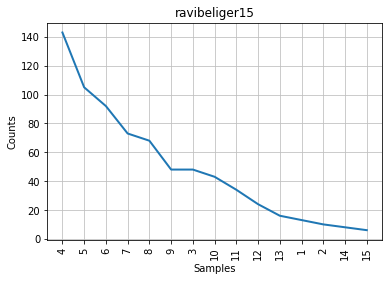

<FreqDist with 19 samples and 744 outcomes>

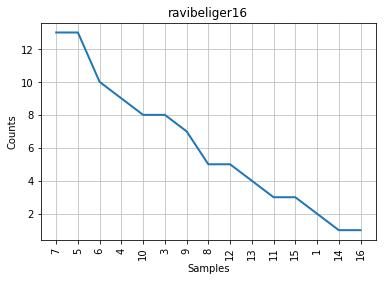

<FreqDist with 16 samples and 93 outcomes>

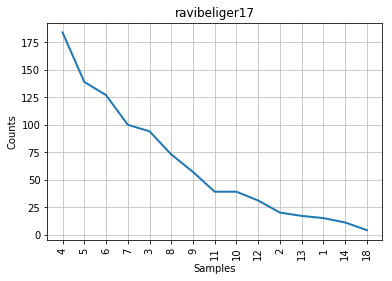

<FreqDist with 20 samples and 962 outcomes>

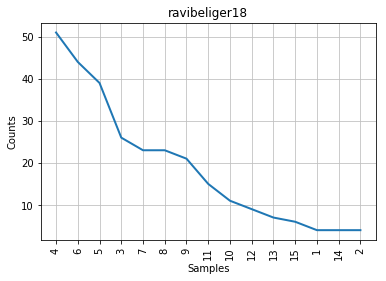

<FreqDist with 18 samples and 293 outcomes>

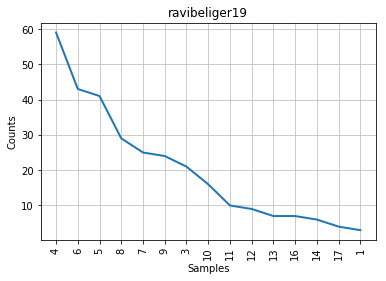

<FreqDist with 21 samples and 310 outcomes>

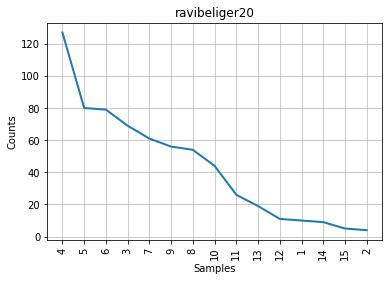

<FreqDist with 22 samples and 667 outcomes>

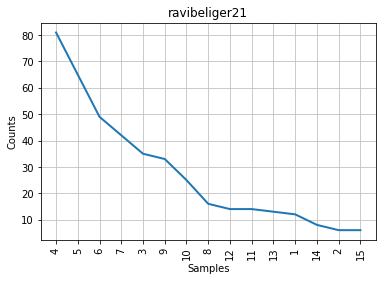

<FreqDist with 21 samples and 430 outcomes>

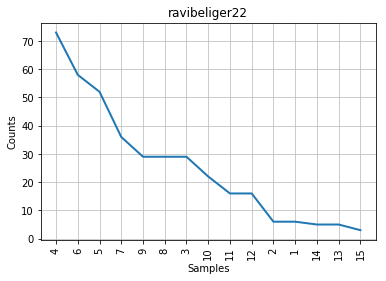

<FreqDist with 16 samples and 386 outcomes>

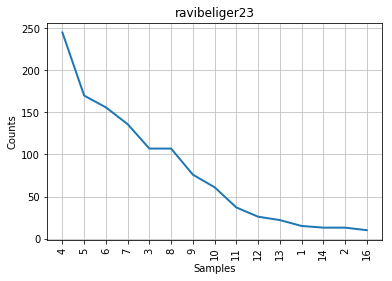

<FreqDist with 21 samples and 1213 outcomes>

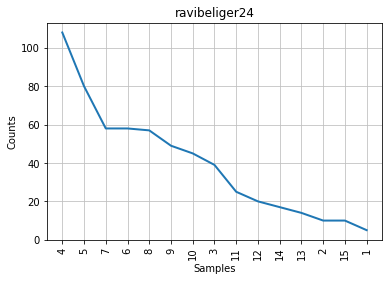

<FreqDist with 20 samples and 607 outcomes>

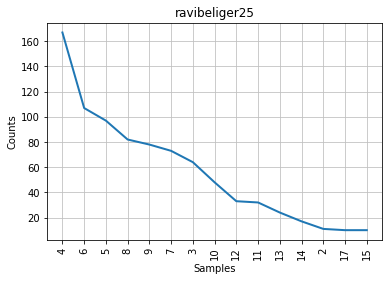

<FreqDist with 19 samples and 869 outcomes>

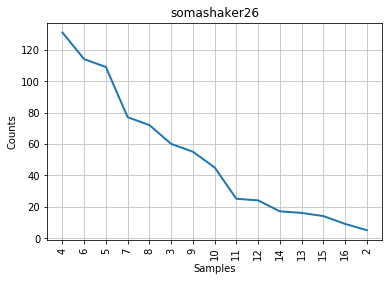

<FreqDist with 20 samples and 784 outcomes>

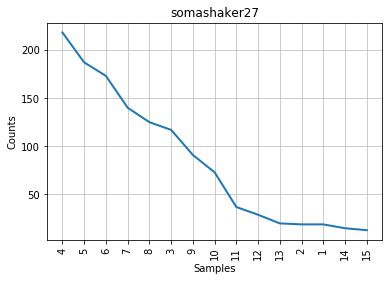

<FreqDist with 19 samples and 1294 outcomes>

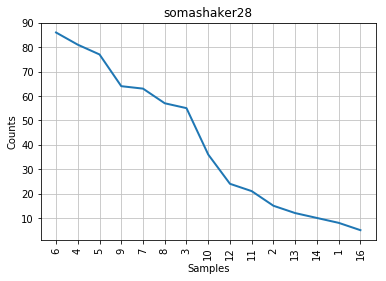

<FreqDist with 23 samples and 630 outcomes>

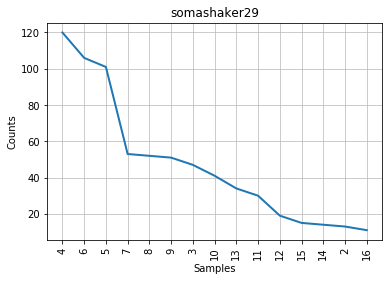

<FreqDist with 21 samples and 721 outcomes>

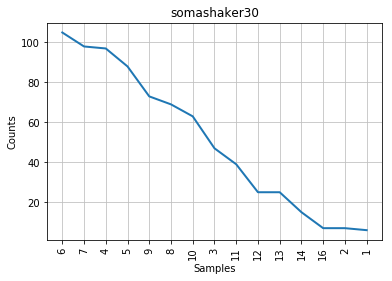

<FreqDist with 23 samples and 784 outcomes>

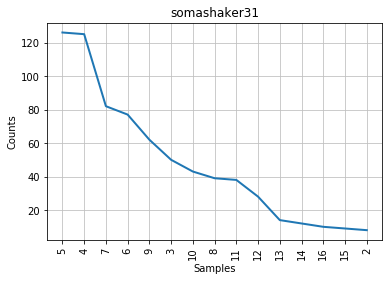

<FreqDist with 22 samples and 753 outcomes>

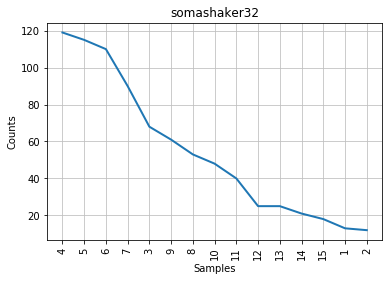

<FreqDist with 21 samples and 842 outcomes>

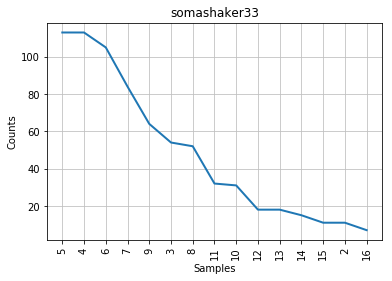

<FreqDist with 21 samples and 745 outcomes>

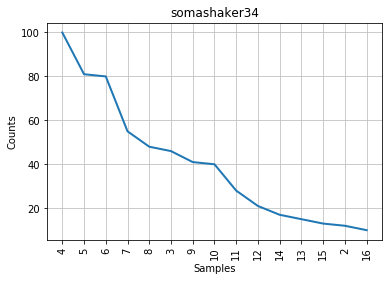

<FreqDist with 22 samples and 634 outcomes>

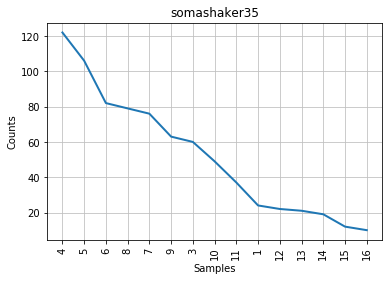

<FreqDist with 21 samples and 808 outcomes>

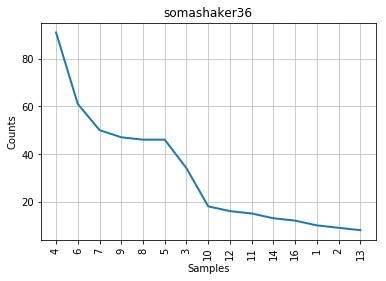

<FreqDist with 20 samples and 496 outcomes>

In [21]:
import nltk
%matplotlib inline
import seaborn as sns
# Compare the disputed papers to those written by everyone,
# including the shared ones.
authors = instance_by_author.keys()

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(instance_by_author[author])
    # Filter out punctuation
    federalist_by_author_tokens[author] = ([token for token in tokens if any(c.isalpha() for c in token)])
    #print(federalist_by_author_tokens[author])
    # Get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15,title=author)
    print(federalist_by_author_length_distributions[author], end='')

In [22]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

def process_to_vecto(X_train, y_train):
    author_fvs={}
    feature_vectors=[]
    for (text,author) in zip(X_train, y_train):
        author_fvs[author]=FeatureExtration(text)     
    dff = pd.DataFrame()
    dff["X_train"] =X_train
    dff["y_train"] = y_train
    dff["features"] =author_fvs.values()
    y_train1 = dff["y_train"]
    vectors1 = dff["features"]
    arr = [0,0,0,0,0,0]
    for i in vectors:
        for k in range(500-len(i)):
            i.append(arr)
    arr = (np.array(vectors))
    flatten_final=[]
    for i in range(len(vectors)):
        flatten_final.append(flatten_list(arr[i]))
        
    flatten_final = np.asarray(flatten_final)
    a = flatten_final
    col_mean = np.nanmean(a, axis=0)
    #Find indices that you need to replace
    inds = np.where(np.isnan(a))
    #Place column means in the indices. Align the arrays using take
    a[inds] = np.take(col_mean, inds[1])
    flatten_final = a
    flatten_final=sparse.csr_matrix(flatten_final)
    return  flatten_final

def namingConv(text):
    z= pd.Series(text)
    z.replace(r'(^ra.*)','ravibeligeri',regex=True, inplace = True)
    z.replace(r'(^hr.*)','hrudayashiva',regex=True, inplace = True)
    z.replace(r'(^som.*)','somashaker',regex=True, inplace = True)
    y_test =z
    return y_test


In [23]:


X=original["text files"]
y=all_authors
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train_Up, X_test_Up, y_train_Up, y_test_Up = train_test_split(X,y,test_size=0.2, random_state=1234)

In [24]:
m=process_to_vecto(X_test_Up,y_test_Up)

In [25]:
n=namingConv(y_train_Up)

In [26]:
model1 = DecisionTreeClassifier(random_state=0)
model1 = model1.fit(m.toarray(), n)
print("Taining Accuracy :",model1.score(m.toarray(), n))
print("Testing Accuracy: ",model1.score(test_flaten.toarray(), y_test))


Taining Accuracy : 1.0
Testing Accuracy:  0.5
